In [1]:
import pandas as pd
import matplotlib.pyplot as pl
%matplotlib inline
import seaborn as sns
import numpy as np
import os

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import cufflinks as cf
cf.go_offline()

![](https://media.giphy.com/media/rM0wxzvwsv5g4/giphy.gif)

### Dataset obtido do Kaggle: Rossmann Store Sales

Esse dataset foi disponibilizado em uma competição do Kaggle com dados de vendas de farmácias do grupo Rossman. O objetivo da competição era fazer a previsão de demanda das lojas com sede na Alemanha. Além dos dados de venda foram fornecidas informações de promoções, feriados e características das lojas.

Link da competição: <https://www.kaggle.com/c/rossmann-store-sales>

Para facilitar a manipulação desse dataset, inicialmente ele foi processado no notebook `Processa Rossmann Dataset`, onde a informação que inicialmente era por data e loja, foi agregrada por data. Sendo calculado os seguintes valores por dia:

- Sales: Soma da venda por dia em todas as lojas
- Customers: Total de clientes em todas  as lojas
- Promo: total de lojas em promoção
- Open: Total de lojas abertas
- SchoolHoliday: Total de lojas localizadas próxima a um feriado escolar em certo dia

### Leitura dos dados

In [2]:
df = pd.read_csv(os.path.join("data", "rossmann_daily.csv"))
df.head()

,Date,Sales,Promo,Customers,Open,SchoolHoliday
0,2014-04-02,8314447,1115,884087,1113,0
1,2013-06-13,6044207,0,739896,1111,0
2,2013-11-04,10568398,1115,1018154,1115,0
3,2014-12-21,259248,0,40226,27,0
4,2014-12-10,5909802,0,669779,935,0


In [3]:
df.isnull().sum()

Date             0
Sales            0
Promo            0
Customers        0
Open             0
SchoolHoliday    0
dtype: int64

### Visualização com gráfico de linha

Vamos visualizar os dados de venda de uma das lojas

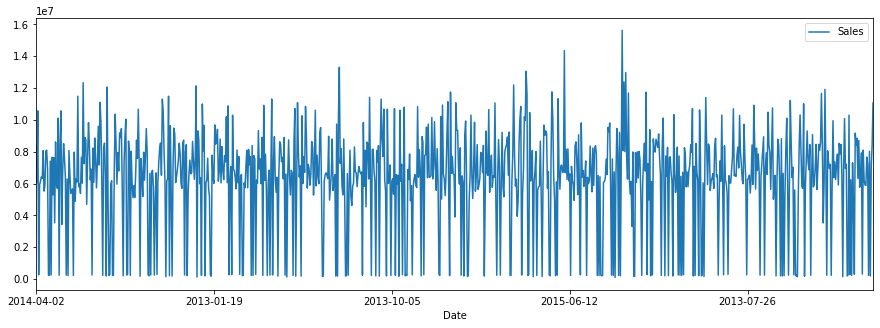

In [4]:
df.plot(x='Date', y='Sales', figsize=(15,5))
pl.show()

In [5]:
df.dtypes

Date             object
Sales             int64
Promo             int64
Customers         int64
Open              int64
SchoolHoliday     int64
dtype: object

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

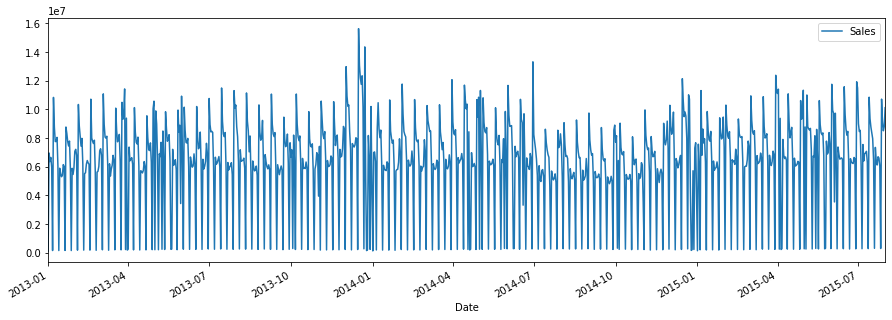

In [7]:
df.plot(x='Date', y='Sales', figsize=(15,5))
pl.show()

### Desafio 1
 
Construa o [gráfico de linha com plotly através do cufflinks](https://plot.ly/ipython-notebooks/cufflinks/#line-charts) agregrado por dia, com venda no eixo da direita e a variável `Promo` no eixo da esquerda (dica: com o parâmetro secondary_y é possível definir uma variável para ficar no eixo da esquerda)
- Gráfico com a soma das venda por semana no eixo da direita e a soma dos clientes na loja por semana no eixo da esquerda

Obs: Inclua título e descrição dos eixos nos gráficos

Dica: Com o cufflinks é necessário ordenar as datas antes de gerar o gráfico, para isso use a função [sort_values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html) do pandas

In [8]:
title = 'Venda x presença de promoção'
df.sort_values(by='Date', inplace=True)
df.iplot(kind='line', x='Date', y='Sales', secondary_y='Promo', title=title, 
                         mode='lines', width=[2,0.5], colors=['orange', 'blue'],
                         yTitle='Sales', secondary_y_title='Promo')

Uma forma de verificar se existe relação entre variáveis é por meio do [gráfico de dispersão](https://pt.wikipedia.org/wiki/Gr%C3%A1fico_de_dispers%C3%A3o)

### Desafio 2

Constra os seguintes gráficos de dispersão que mostram a relação de `Customers` em relação a `Sales`:

- Construa o gráfico de dispersão usando o método [scatter do pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html)
- Construa o gráfico de dispersão usando o método [joinplot do seaborn](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

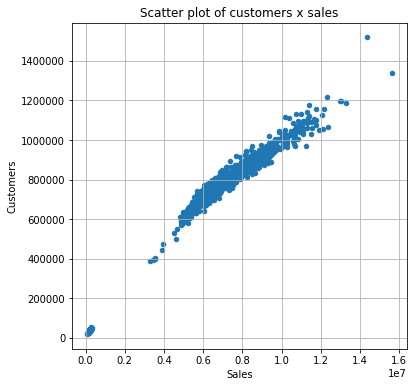

In [9]:
df.plot.scatter(x='Sales', y='Customers', figsize=(6,6))
pl.title('Scatter plot of customers x sales')
pl.grid()

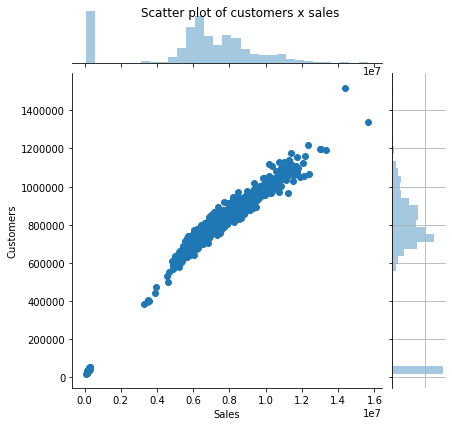

In [10]:
sns.jointplot("Sales", "Customers", data=df, kind="scatter") #"reg","hex")
pl.suptitle('Scatter plot of customers x sales')
pl.grid()
pl.show()

O método pairplot do seaborn mostra o gráfico de dispersão entre todas as variáves do dataframe de entrada e mostra o histograma de cada uma das variáveis

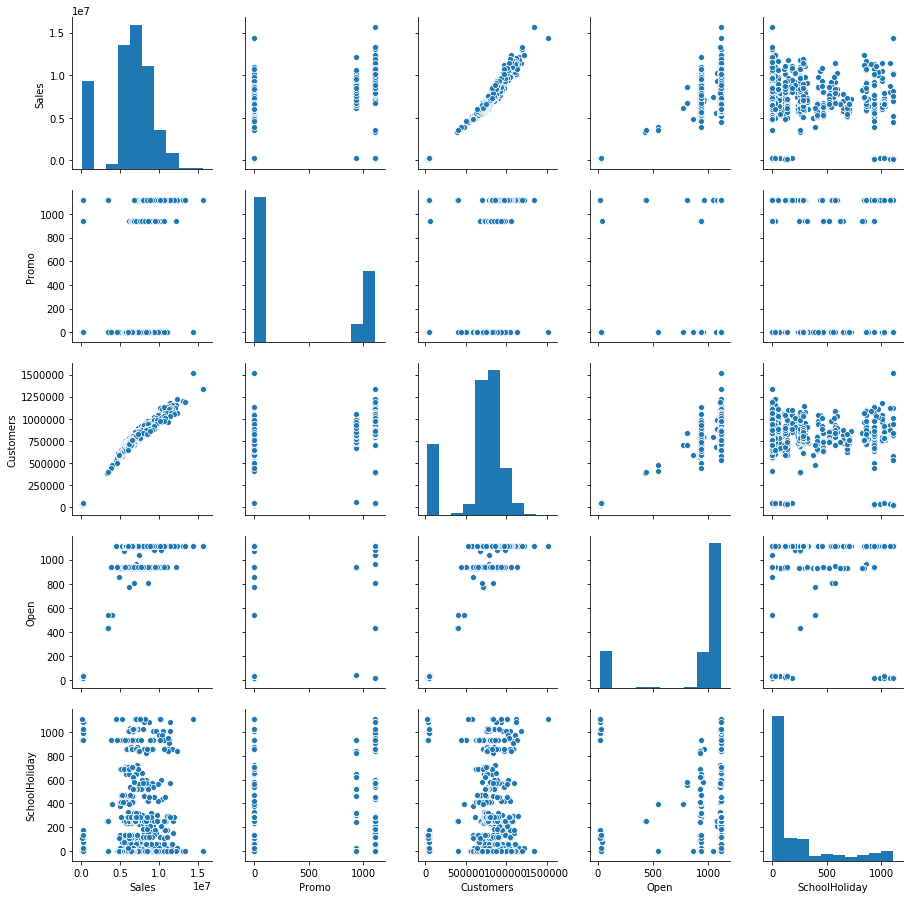

In [11]:
sns.pairplot(df)
pl.show()

O gráfico acima permite ver com alto nível de detalhe a relação entre variáveis. Porém para as variáveis binárias esse gráfico não é ideal. Além de exigir uma análise maior para identificar possíveis relações existentes. Uma alternativa para identificar de forma mais direta relações existente, é o heatmap com a [correlação](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson) entre as variáveis de interesse.

### Desafio 3 (EXTRA)
Construa o hetmap para que mostra a correlação entre as seguintes variáveis:
- Sales
- Customers
- Open
- Promo
- SchoolHoliday

Obs: Siga os passos desse [tutorial](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)

In [12]:
corr = df[['Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday']].corr()
corr

,Sales,Customers,Open,Promo,SchoolHoliday
Sales,1.000000,0.983710,0.874122,0.603501,0.144202
Customers,0.983710,1.000000,0.936725,0.508760,0.148753
Open,0.874122,0.936725,1.000000,0.304420,0.099321
Promo,0.603501,0.508760,0.304420,1.000000,0.083702
SchoolHoliday,0.144202,0.148753,0.099321,0.083702,1.000000


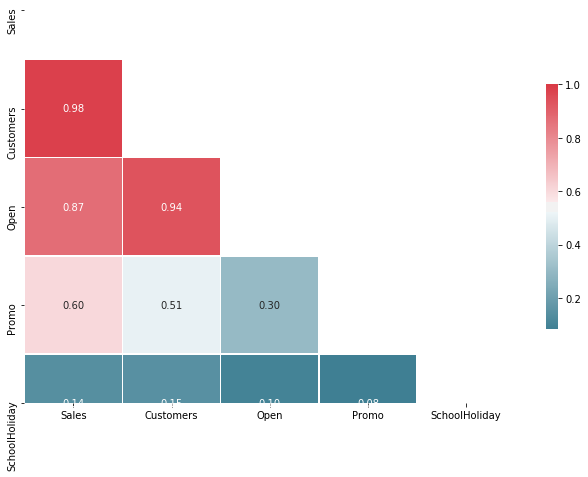

In [13]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
pl.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, 
            cbar_kws={"shrink": .5}, annot=True, fmt=".2f")
pl.show()

### Desafio 4 (EXTRA)

Construa os gráficos iterativos que mostram a relação de `Customers` em relação a `Sales` usando o **cufflinks**  e o **plotly**.

In [14]:
df.iplot(kind='scatter', x='Sales', y='Customers', mode='markers', size=5, 
         xTitle='Venda', yTitle='Clientes')

Alguns tipos de customização não seria possível fazer com o cufflinks, por exemplo caso houvesse a necessidade de alterar o texto quando passe o mouse em cima do de um ponto do gráfico acima não seria possível. Já com o plotly é possível fazer uma customização maior nos gráficos. No exemplo abaixo foi alterado o texto, sendo incluso a descrição de quantas lojas estavam em promoção.

In [15]:
plot_data = [go.Scatter(x=df['Sales'], 
                        y=df['Customers'],
                        mode='markers',
                        name='markers',
                        hoverinfo='text',
                        text=df.apply(
                            lambda x: "Num. lojas promoção: {Promo} <br> Venda: {Sales} <br> Clientes: {Customers}".format(**x), 
                            axis=1)
                       )]

plot_layout = dict(
    xaxis=dict(title='Venda'),
    yaxis=dict(title='Clientes'),
)
    
figure = go.Figure(data=plot_data, layout=plot_layout)
py.iplot(figure)